In [95]:
from matplotlib import pyplot as plt
import pandas as pd
from glob import glob
import numpy as np
import os

In [96]:
drfiles = glob('resampling_output/posterior_occs/DR*csv')
papafiles = glob('resampling_output/posterior_occs/PAPA*csv')

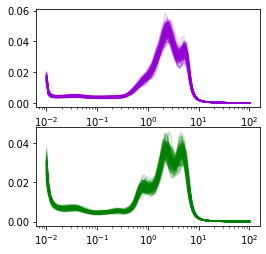

In [97]:
fig,axs = plt.subplots(2,1,figsize=(4,4))

for f in drfiles:
    df = pd.read_csv(f)
    D = df.groupby('diff_coef',as_index=False).sum()['diff_coef']
    mpo = df.groupby('diff_coef',as_index=False).sum()['mean_posterior_occupation']
    axs[0].semilogx(D,mpo,color='darkviolet',alpha=0.2)

for f in papafiles:
    df = pd.read_csv(f)
    D = df.groupby('diff_coef',as_index=False).sum()['diff_coef']
    mpo = df.groupby('diff_coef',as_index=False).sum()['mean_posterior_occupation']
    axs[1].semilogx(D,mpo,color='green',alpha=0.2)

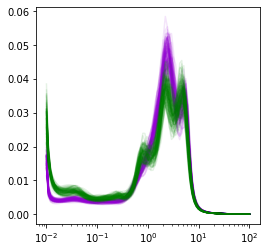

In [98]:
fig,axs = plt.subplots(1,1,figsize=(4,4))

for f in drfiles:
    df = pd.read_csv(f)
    D = df.groupby('diff_coef',as_index=False).sum()['diff_coef']
    mpo = df.groupby('diff_coef',as_index=False).sum()['mean_posterior_occupation']
    axs.semilogx(D,mpo,color='darkviolet',alpha=0.1)

for f in papafiles:
    df = pd.read_csv(f)
    D = df.groupby('diff_coef',as_index=False).sum()['diff_coef']
    mpo = df.groupby('diff_coef',as_index=False).sum()['mean_posterior_occupation']
    axs.semilogx(D,mpo,color='green',alpha=0.1)

In [99]:
# Plot pairwise differences between PAPA and DR for the same subsampled cells

allmpo_dr = np.array([])
allmpo_papa = np.array([])

drfiles = glob('resampling_output/posterior_occs/DR*csv')

for f in drfiles:
    
    fpapa = 'resampling_output/posterior_occs/PAPA' + f[35:]
    
    if not os.path.isfile(fpapa):
        continue
    # read in DR diffusion profile for subsampled cells
    df = pd.read_csv(f)
    mpo = df.groupby('diff_coef',as_index=False).sum()['mean_posterior_occupation']
    if allmpo_dr.size==0:
        allmpo_dr = mpo.to_numpy()
    else:
        allmpo_dr = np.vstack([allmpo_dr,mpo.to_numpy()])
    
    # read in PAPA diffusion profile for the same set of cells
    dfpapa = pd.read_csv(fpapa)
    mpopapa = dfpapa.groupby('diff_coef',as_index=False).sum()['mean_posterior_occupation']
    if allmpo_papa.size==0:
        allmpo_papa = mpopapa.to_numpy()
    else:
        allmpo_papa = np.vstack([allmpo_papa,mpopapa.to_numpy()])
    
    #ax.semilogx(D,mpopapa-mpo,color='darkviolet',alpha=0.2)
D = df.groupby('diff_coef',as_index=False).sum()['diff_coef']
D = D.to_numpy()

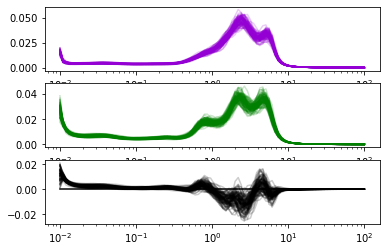

In [100]:
# Plot all bootstrap resampled traces

fig,axs = plt.subplots(3,1)

[axs[0].semilogx(D,allmpo_dr[j,:],color='darkviolet',alpha=0.2) for j in range(allmpo_dr.shape[0])];
[axs[1].semilogx(D,allmpo_papa[j,:],color='green',alpha=0.2) for j in range(allmpo_papa.shape[0])];
axs[2].semilogx([.01,100],[0,0],'k-')
[axs[2].semilogx(D,allmpo_papa[j,:]-allmpo_dr[j,:],color='black',alpha=0.2) for j in range(allmpo_papa.shape[0])];


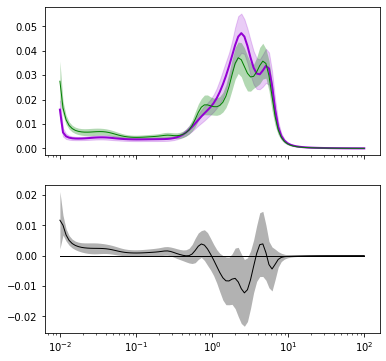

In [101]:
# Plot estimated 95% confidence interval (mean +/- 2 standard deviations at each D)
# For PAPA, DR, and the difference between them.

fig,axs = plt.subplots(2,1,figsize=(6,6))

axs[0].semilogx(D,allmpo_dr.mean(axis=0),color='darkviolet',alpha=1,linewidth=2);
axs[0].fill_between(D,allmpo_dr.mean(axis=0)-2*allmpo_dr.std(axis=0),
                    allmpo_dr.mean(axis=0)+2*allmpo_dr.std(axis=0),
                    color='darkviolet',alpha=0.2);

axs[0].semilogx(D,allmpo_papa.mean(axis=0),color='green',alpha=1,linewidth=1);
axs[0].fill_between(D,allmpo_papa.mean(axis=0)-2*allmpo_papa.std(axis=0),
                    allmpo_papa.mean(axis=0)+2*allmpo_papa.std(axis=0),
                    color='green',alpha=0.3,linewidth=0);

axs[0].set_xticks([.01,.1,1,10,100])
axs[0].set_xticklabels([])

axs[1].semilogx([.01,100],[0,0],'k-',linewidth=1)
allmpo_diff = allmpo_papa-allmpo_dr
axs[1].semilogx(D,allmpo_diff.mean(axis=0),color='black',alpha=1,linewidth=1);
axs[1].fill_between(D,allmpo_diff.mean(axis=0)-2*allmpo_diff.std(axis=0),
                    allmpo_diff.mean(axis=0)+2*allmpo_diff.std(axis=0),
                    color='black',alpha=0.3,linewidth=0);
axs[1].set_xticks([.01,.1,1,10,100])

plt.savefig('state_array_bootstrap_CI.png',dpi=300,bbox_inches='tight')
plt.savefig('state_array_bootstrap_CI.pdf',bbox_inches='tight')

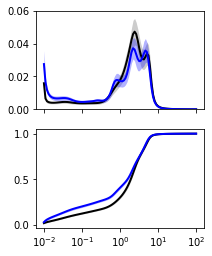

In [112]:
# Plot estimated 95% confidence interval (mean +/- 2 standard deviations at each D)
# For PAPA, DR, and the difference between them.

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # Use Type 42 fonts (or change to 3 for Type 3 fonts)
matplotlib.rcParams['ps.fonttype'] = 42  # Ensures PostScript compliance


fig,axs = plt.subplots(2,1,figsize=(3,4))

axs[0].semilogx(D,allmpo_dr.mean(axis=0),color='black',alpha=1,linewidth=2);
axs[0].fill_between(D,allmpo_dr.mean(axis=0)-2*allmpo_dr.std(axis=0),
                    allmpo_dr.mean(axis=0)+2*allmpo_dr.std(axis=0),
                    color='black',alpha=0.2,linewidth=0);

axs[0].semilogx(D,allmpo_papa.mean(axis=0),color='blue',alpha=1,linewidth=2);
axs[0].fill_between(D,allmpo_papa.mean(axis=0)-2*allmpo_papa.std(axis=0),
                    allmpo_papa.mean(axis=0)+2*allmpo_papa.std(axis=0),
                    color='blue',alpha=0.3,linewidth=0);

allmpo_dr_cumulative = allmpo_dr.cumsum(axis=1)
axs[1].semilogx(D,allmpo_dr_cumulative.mean(axis=0),color='black',alpha=1,linewidth=2);
axs[1].fill_between(D,allmpo_dr_cumulative.mean(axis=0)-2*allmpo_dr_cumulative.std(axis=0),
                    allmpo_dr_cumulative.mean(axis=0)+2*allmpo_dr_cumulative.std(axis=0),
                    color='black',alpha=0.2,linewidth=0);


allmpo_papa_cumulative = allmpo_papa.cumsum(axis=1)
axs[1].semilogx(D,allmpo_papa_cumulative.mean(axis=0),color='blue',alpha=1,linewidth=2);
axs[1].fill_between(D,(allmpo_papa_cumulative.mean(axis=0)-2*allmpo_papa_cumulative.std(axis=0)),
                    (allmpo_papa_cumulative.mean(axis=0)+2*allmpo_papa_cumulative.std(axis=0)),
                    color='blue',alpha=0.3,linewidth=0);

axs[0].set_xticks([.01,.1,1,10,100])
axs[0].set_xticklabels([])
axs[1].set_xticks([.01,.1,1,10,100])
# currylim = plt.ylim()
# plt.ylim([0,currylim[1]])
axs[0].set_ylim([0,0.06])

plt.savefig('state_array_bootstrap_CI_onefig.png',dpi=300,bbox_inches='tight')
plt.savefig('state_array_bootstrap_CI_onefig.pdf',bbox_inches='tight')

In [108]:
!wslpath -w `pwd`

H:\SMT_analysis\ANALYSIS\BRD4-CycT1_JQ1\pre\bootstrapping


Fbound DR = 0.119 ± 0.007
Fbound PAPA = 0.197 ± 0.012
P value = 4.12e-30


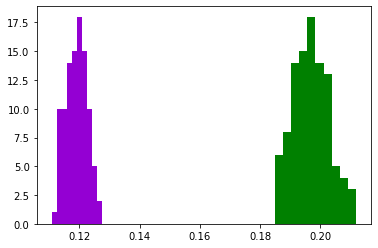

In [105]:
from scipy.stats import norm

# calculate error bound of fraction bound from bootstrap resampling
fbound_dr = allmpo_dr[:,D<0.1].sum(axis=1)
fbound_papa = allmpo_papa[:,D<0.1].sum(axis=1)

fbound_dr_mean = fbound_dr.mean()
fbound_dr_std = fbound_dr.std()
print(f"Fbound DR = {fbound_dr_mean:.3f} ± {2*fbound_dr_std:.3f}")

fbound_papa_mean = fbound_papa.mean()
fbound_papa_std = fbound_papa.std()
print(f"Fbound PAPA = {fbound_papa_mean:.3f} ± {2*fbound_papa_std:.3f}")

# calculate resampling distributions of fbound for DR and PAPA
plt.hist(fbound_dr,color='darkviolet')
plt.hist(fbound_papa,color='green');

# calculate 2-sided p-value for a difference this extreme
pval = norm.sf(fbound_papa_mean-fbound_dr_mean,loc=0,scale=np.sqrt(fbound_dr_std**2 + fbound_papa_std**2))
print(f'P value = {pval:.3}')

with open('fbound_stats.txt','w') as fh:
    fh.write(f"Fbound DR = {fbound_dr_mean:.3f} ± {2*fbound_dr_std:.3f}\n")
    fh.write(f"Fbound PAPA = {fbound_papa_mean:.3f} ± {2*fbound_papa_std:.3f}\n")
    fh.write(f'P value = {pval:.3}')
    
plt.savefig('fbound_resampled_hist.png',dpi=300,bbox_inches='tight')
plt.savefig('fbound_resampled_hist.pdf',bbox_inches='tight')